
Import DataSet From Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries and Packages


1.   TensorFlow
2.   PIL (Python Imaging Library)
3.   OpenCV (Open Source Computer Vision Library)
4.   NumPy
5.   Matplotlib
6.   EasyOCR
7.   pytesseract





In [ ]:
import tensorflow as tf
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

!pip install easyocr opencv-python-headless matplotlib

import easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [ ]:
# Install Tesseract-OCR and Pytesseract if running in an environment like Google Colab
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,392 kB]
Fetched 1,652 kB in 2s (1,040 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state infor

Loading a pre-trained VGG16 model

In [ ]:
import pytesseract

# Load pre-trained CNN model for image similarity
model = tf.keras.applications.VGG16(weights='imagenet', include_top=False)


58889256/58889256 [==============================] - 2s 0us/step


Functions :


1.   preprocess_image
2.   get_image_features
3.   cosine_similarity





In [ ]:
def preprocess_image(img):
    """Preprocesses an image for the CNN model."""
    img = np.array(img)  # Ensure the image is a numpy array
    img = tf.image.resize(img, (224, 224))
    img = tf.keras.applications.vgg16.preprocess_input(img)
    return img

def get_image_features(img):
    """Extracts features from an image using the CNN model."""
    img = preprocess_image(img)
    features = model.predict(tf.expand_dims(img, axis=0))
    features_tensor = tf.convert_to_tensor(features.flatten(), dtype=tf.float32)
    return tf.reshape(features_tensor, (1, -1))  # Ensure the tensor is 2-dimensional


def cosine_similarity(feat1, feat2):
    """Calculates the cosine similarity between two feature vectors."""
    norm1 = tf.linalg.norm(feat1)
    norm2 = tf.linalg.norm(feat2)
    dot_product = tf.keras.backend.dot(feat1, tf.transpose(feat2))  # Adjusted for 2D tensors
    return dot_product / (norm1 * norm2)



Solving Problem From Set8 and Set9 using EasyOCR , OpenCV , MatplotLib


*   Crops Image
*   Converts the Cropped Image to GrayScale
*   Extracts Text from Image
*   Prints the extracted Bet Number / Total Win





In [20]:
from PIL import Image

def solve(problem , test_image):
  image_path1 = f'drive/MyDrive/SlotsProject/Problems/{problem}/{test_image}'

  if problem == "Set9":

    # Open the image
    image = Image.open(image_path1)

    # Get the image size
    width, height = image.size

    # Open the image
    image = Image.open(image_path1)

    # Define the bounding box for the crop
    left =1400
    top = height-400
    right = 2000
    bottom = height

    # Crop the image
    cropped_image = image.crop((left, top, right, bottom))

    # Save the cropped image
    cropped_image.save(f'drive/MyDrive/SlotsProject/Cropped/{problem}/{test_image}')

    # Load the cropped image
    cropped_image = Image.open(f'drive/MyDrive/SlotsProject/Cropped/{problem}/{test_image}')

    # Show the cropped image
    plt.imshow(cropped_image)
    plt.show()

    image_path =  f'drive/MyDrive/SlotsProject/Cropped/{problem}/{test_image}'

    # Step 4: Load and preprocess the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Use thresholding to preprocess the image
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

    # Display the preprocessed image (optional)
    plt.imshow(thresh, cmap='gray')
    plt.axis('off')
    plt.show()

    # Step 5: Use EasyOCR to extract text
    reader = easyocr.Reader(['en'])
    result = reader.readtext(thresh, detail=0)

    # Print all extracted text (optional for debugging)
    print("Extracted Text:", result)

    bet_amount = None

    # Iterate through the extracted text list
    for i in range(len(result)):
        if result[i] == 'BET' and i + 1 < len(result):
            bet_amount = result[i + 1]
            break
        else:
            bet_amount = result[1]

    # Print the extracted BET number
    if bet_amount:
        print("Bet Amount in ", {test_image} , " : " ,bet_amount)
    else:
        print("No BET number found in the extracted text.")


  elif problem == "Set8":
    # Open the image
    image = Image.open(image_path1)

    # Get the image size
    width, height = image.size

    # Open the image
    image = Image.open(image_path1)

    # Open the image
    image = Image.open(image_path1)

    # Define the bounding box for the crop
    left =800
    top = height-450
    right = 1500
    bottom = height

    # Crop the image
    cropped_image1 = image.crop((left, top, right, bottom))

    # Save the cropped image
    cropped_image1.save(f'drive/MyDrive/SlotsProject/Cropped/{problem}/{test_image}')

    # Load the cropped image
    cropped_image1 = Image.open(f'drive/MyDrive/SlotsProject/Cropped/{problem}/{test_image}')

    # Show the cropped image
    plt.imshow(cropped_image1)
    plt.show()

    image_path2 = f'drive/MyDrive/SlotsProject/Cropped/{problem}/{test_image}'

    # Step 4: Load and preprocess the image
    image = cv2.imread(image_path2)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Use thresholding to preprocess the image
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

    # Display the preprocessed image (optional)
    plt.imshow(thresh, cmap='gray')
    plt.axis('off')
    plt.show()

    # Step 5: Use EasyOCR to extract text
    reader = easyocr.Reader(['en'])
    result = reader.readtext(thresh, detail=0)

    # Print all extracted text (optional for debugging)
    print("Extracted Text:", result)

    total_win = None

    # Iterate through the extracted text list
    for i in range(len(result)):
        if result[i] == 'TOTAL WIN' and i + 1 <= len(result):
            total_win = result[i -1]
            break
        else:
            total_win = None

    # Print the extracted BET number
    if total_win:
        print("TOTAL WIN ", {test_image} , " : ", total_win)
    else:
        print("No Total Win")




Solution For the Set1 to Set7:


1.   Main image Processing
    *   Convert to RGB
    *   get_image_features


2.  Test1 image Processing
    *   Convert to RGB
    *   get_image_features

3.  Test2 image Processing
    *   Convert to RGB
    *   get_image_features

4.  Extracting Cosine Similarities




In [ ]:
class Solution:

   def init(self):
        """
        Initialize text recognition engine (optional for Sets 8 & 9).
        """
        # If on Windows, specify the path to tesseract.exe
        # pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

   def get_answer(self, problem):
        """
        Solve the problem specified by the set name.
        """
        if problem in ['Set8', 'Set9']:
              # Text recognition for amount extraction
              results = []
              for test_image in ['Test1.png', 'Test2.png']:
                results.append(solve(problem , test_image))
              return results

        else:
             # Image similarity for main image detection
            results = []
            main_image_path = f'drive/MyDrive/SlotsProject/Problems/{problem}/Image.png'
            main_image = Image.open(main_image_path)
            main_image = main_image.convert('RGB')  # Ensure image is in RGB mode
            main_features = get_image_features(main_image)

            print(f"Main features type: {type(main_features)}, shape: {main_features.shape}")

            for test_image in ['Test1.png', 'Test2.png']:
                test_image_path = f'drive/MyDrive/SlotsProject/Problems/{problem}/{test_image}'
                test_img = Image.open(test_image_path)
                test_img = test_img.convert('RGB')  # Ensure image is in RGB mode
                test_features = get_image_features(test_img)

                print(f"Test features type: {type(test_features)}, shape: {test_features.shape}")

                similarity = cosine_similarity(main_features, test_features)

                print(f"Similarity type: {type(similarity)}, value: {similarity}")

                if isinstance(similarity, tf.Tensor):
                    similarity = similarity.numpy()

                # Extract the scalar value from the resulting array and convert to percentage
                similarity_percentage = float(similarity[0][0] * 100)
                results.append(similarity_percentage)
            return results




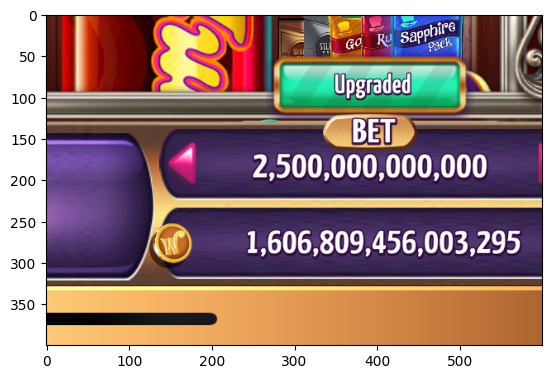

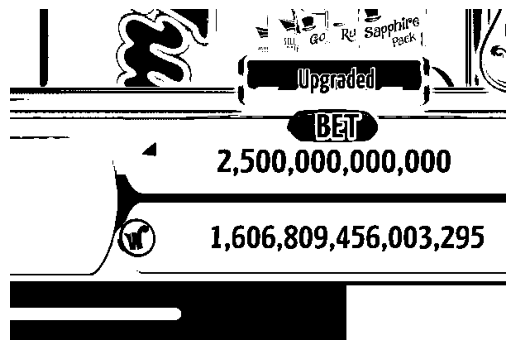

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteExtracted Text: ['Go,', 'Re', 'Upgraded', 'BET', '2,500,000,000,000', '1,606,809,456,003,295', 'Sapphire', 'Pack ,']
Bet Amount in  {'Test1.png'}  :  2,500,000,000,000


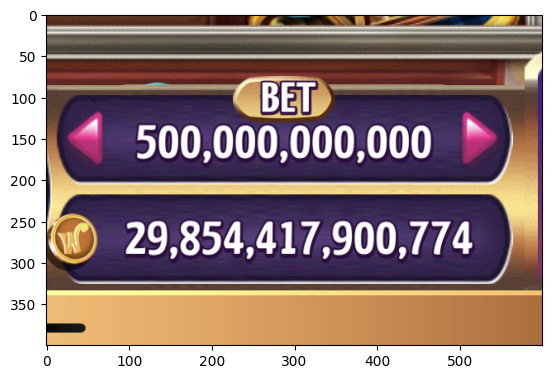

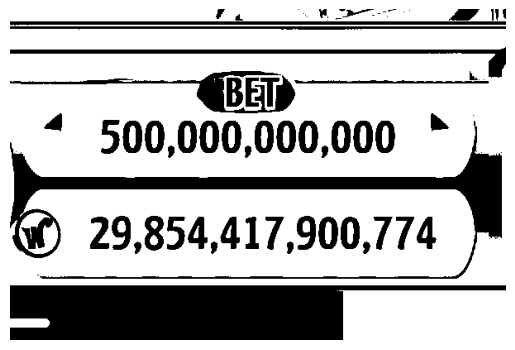

Extracted Text: ['BET', '500,000,000,000', '29,854,417,900,774']
Bet Amount in  {'Test2.png'}  :  500,000,000,000


In [21]:
# Example usage
solution = Solution()
problem = 'Set9'  # Replace with the specific set
results = solution.get_answer(problem)
if problem in ['Set8', 'Set9']:
  pass
else :
  print(f"Similarity percentages for {problem}: {results}")